In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

from models.MeTooDataset import MeTooDataset

In [2]:
experiment_name = '6A'

In [3]:
algorithm_name = 'bow'

In [4]:
profile_ids = [783214, 19568591, 103018203, 256881576, 810619093749559296]

In [5]:
labels=list('ABDEF')

# Target Classification

### Target Classification Training

In [6]:
target_training_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_training'
)

In [7]:
target_testing_profiles_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_testing_profiles'
)

In [8]:
vectorizer = CountVectorizer(ngram_range=(1, 1))

In [9]:
corpus = [
    *target_training_dataset.X, 
    *target_testing_profiles_dataset.X
]

In [10]:
X = vectorizer.fit_transform(corpus)

In [11]:
svm_target_classification = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [12]:
svm_target_classification.fit(
    X[:len(target_training_dataset.X)],
    target_training_dataset.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Target Classification Prediction

In [13]:
target_predictions = svm_target_classification.predict(X[len(target_training_dataset.X):])

In [14]:
predicted_tweets_and_ids_objectification_of_women = []
predicted_tweets_and_ids_gender_equality = []
predicted_tweets_and_ids_conservatism = []

Creating lists of Tweets, one for each target.

In [15]:
for label, tweet, id in list(zip(target_predictions, target_testing_profiles_dataset.X, target_testing_profiles_dataset.id)):
    if label == 0:
        predicted_tweets_and_ids_objectification_of_women.append((tweet, id))
    elif label == 1:
        predicted_tweets_and_ids_gender_equality.append((tweet, id))
    elif label == 2:
        predicted_tweets_and_ids_conservatism.append((tweet, id))
    else:
        raise ValueError(f"Unsupported label: {label}")

# Stance Classification - Objectification of Women

### Stance Classification Training - Objectification of Women

In [16]:
stance_training_dataset_objectification_of_women = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Objectification of Women'
)

In [17]:
predicted_tweets_objectification_of_women = [
    tweet for tweet, _ in predicted_tweets_and_ids_objectification_of_women
]

In [18]:
corpus_objectification_of_women = [
    *stance_training_dataset_objectification_of_women.X,
    *predicted_tweets_objectification_of_women
]

In [19]:
X = vectorizer.fit_transform(corpus_objectification_of_women)

In [20]:
svm_objectification_of_women = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [21]:
svm_objectification_of_women.fit(
    X[:len(stance_training_dataset_objectification_of_women.X)],
    stance_training_dataset_objectification_of_women.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Objectification of Women

In [22]:
predictions_objectification_of_women = svm_objectification_of_women.predict(
    X[len(stance_training_dataset_objectification_of_women.X):]
)

In [23]:
predictions_and_ids_objectification_of_women = list(
    zip(
        predictions_objectification_of_women,
        [
            idx for _, idx in predicted_tweets_and_ids_objectification_of_women
        ]
    )
)

In [24]:
stances_objectification_of_women = {}

In [25]:
sorted_predictions_and_ids_objectification_of_women = sorted(
    predictions_and_ids_objectification_of_women,
    key=operator.itemgetter(1)
)

In [26]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_objectification_of_women, operator.itemgetter(1)):
    stances_objectification_of_women[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Gender Equality

### Stance Classification Training - Gender Equality

In [27]:
stance_training_dataset_gender_equality = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Gender Equality'
)

In [28]:
predicted_tweets_gender_equality = [
    tweet for tweet, _ in predicted_tweets_and_ids_gender_equality
]

In [29]:
corpus_gender_equality = [
    *stance_training_dataset_gender_equality.X,
    *predicted_tweets_gender_equality
]

In [30]:
X = vectorizer.fit_transform(corpus_gender_equality)

In [31]:
svm_gender_equality = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [32]:
svm_gender_equality.fit(
    X[:len(stance_training_dataset_gender_equality.X)],
    stance_training_dataset_gender_equality.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Gender Equality

In [33]:
predictions_gender_equality = svm_gender_equality.predict(
    X[len(stance_training_dataset_gender_equality.X):]
)

In [34]:
predictions_and_ids_gender_equality = list(
    zip(
        predictions_gender_equality,
        [
            idx for _, idx in predicted_tweets_and_ids_gender_equality
        ]
    )
)

In [35]:
stances_gender_equality = {}

In [36]:
sorted_predictions_and_ids_gender_equality = sorted(
    predictions_and_ids_gender_equality,
    key=operator.itemgetter(1)
)

In [37]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_gender_equality, operator.itemgetter(1)):
    stances_gender_equality[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Conservatism

### Stance Classification Training - Conservatism

In [38]:
stance_training_dataset_conservatism = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Conservatism'
)

In [39]:
predicted_tweets_conservatism = [
    tweet for tweet, _ in predicted_tweets_and_ids_conservatism
]

In [40]:
corpus_conservatism = [
    *stance_training_dataset_conservatism.X,
    *predicted_tweets_conservatism
]

In [41]:
X = vectorizer.fit_transform(corpus_conservatism)

In [42]:
svm_conservatism = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [43]:
svm_conservatism.fit(
    X[:len(stance_training_dataset_conservatism.X)],
    stance_training_dataset_conservatism.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Conservatism

In [44]:
predictions_conservatism = svm_conservatism.predict(
    X[len(stance_training_dataset_conservatism.X):]
)

In [45]:
predictions_and_ids_conservatism = list(
    zip(
        predictions_conservatism,
        [
            idx for _, idx in predicted_tweets_and_ids_conservatism
        ]
    )
)

In [46]:
stances_conservatism = {}

In [47]:
sorted_predictions_and_ids_conservatism = sorted(
    predictions_and_ids_conservatism,
    key=operator.itemgetter(1)
)

In [48]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_conservatism, operator.itemgetter(1)):
    stances_conservatism[user_id] = np.mean([stance for stance, _ in list(g)])

# Profile Vectors

Based on fields `Objectification of Women`, `Gender Equality`, and `Conservatism`.

In [67]:
metoo_vector = np.array([[-1, 1, -1]])

In [50]:
profile_vectors = {
    user_id: {
        'Objectification of Women': stances_objectification_of_women[user_id],
        'Gender Equality':  stances_gender_equality[user_id],
        'Conservatism': stances_conservatism[user_id]
    }
    
    for user_id in profile_ids
}

In [51]:
df = (pd
      .DataFrame
      .from_dict(profile_vectors, orient='index')
      .applymap(lambda x: x - 1))

df = df[['Objectification of Women', 'Gender Equality', 'Conservatism']]

In [52]:
df.plot(kind='bar', title=f'Predicted Stances using Vanilla Bag-of-Words', legend=True, rot=45)
plt.axhline(0, color='k')
plt.xticks(np.arange(len(labels)), labels, rotation=0)
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [53]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}.tex', 'w', encoding='utf-8') as f:
    df.to_latex(f)

In [68]:
stances_df = pd.DataFrame.from_dict(
    {
        user_id: {
            'Stance': float(cosine_similarity(metoo_vector.reshape(1, -1), df.loc[user_id].values.reshape(1, -1)))
        }
        for user_id in profile_ids
    },
    orient='index'
)

In [70]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}_stances.tex', 'w', encoding='utf-8') as f:
    stances_df.to_latex(f)

# Compute Mean Squared Error w.r.t. Means of Stances

In [54]:
with open(f'/home/nils/Documents/thesis/data/means_of_stances.csv', 'r') as f:
    means_df = pd.read_csv(f, index_col=0)

In [55]:
mse_df = pd.DataFrame.from_dict(
    {
        user_id: {
            'Mean Squared Error': mean_squared_error(
                df.loc[user_id].values,
                means_df.loc[user_id].values
            )
        }
        for user_id in profile_ids
    },
    orient='index'
)

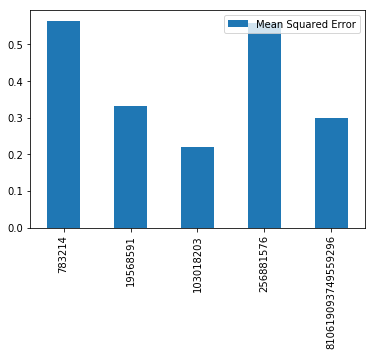

In [56]:
mse_df.plot(kind='bar')

In [57]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}_mse.tex', 'w', encoding='utf-8') as f:
    mse_df.to_latex(f)

In [58]:
with open(f'/home/nils/Documents/thesis/data/{experiment_name}_{algorithm_name}_mse.csv', 'w', encoding='utf-8') as f:
    mse_df.to_csv(f)